<a href="https://colab.research.google.com/github/rafael-bork/Applied-Machine-Learning/blob/main/Wine_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1
Create a script to train a Regression model to predict the response variable "quality" given the available explanatory variables for the Wine Quality data set.

In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo

In [17]:
# Fetch dataset
wine_quality = fetch_ucirepo(id=186)

# Data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

print(X.head(), "\n")
print(y.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4   

   qua

In [18]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization (range from 0 to 1)
X_normalized = scaler.fit_transform(X)

# Convert normalized data to PyTorch tensor
X_normalized_tensor = torch.tensor(X_normalized, dtype=torch.float32)

In [19]:
n_samples, n_features = X_tensor.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.00005

# The loss function is Mean Squared Error
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
num_epochs = 500
losses = []  # To store loss at each epoch
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X_tensor)
    loss = criterion(y_predicted, y_tensor)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # Zero gradient before new step
    optimizer.zero_grad()

    # Store the loss for plotting
    losses.append(loss.item())

    if (epoch+1) % 50 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 50, loss = 17.1571
epoch: 100, loss = 11.6634
epoch: 150, loss = 8.1324
epoch: 200, loss = 5.7741
epoch: 250, loss = 4.1758
epoch: 300, loss = 3.0858
epoch: 350, loss = 2.3398
epoch: 400, loss = 1.8276
epoch: 450, loss = 1.4748
epoch: 500, loss = 1.2310


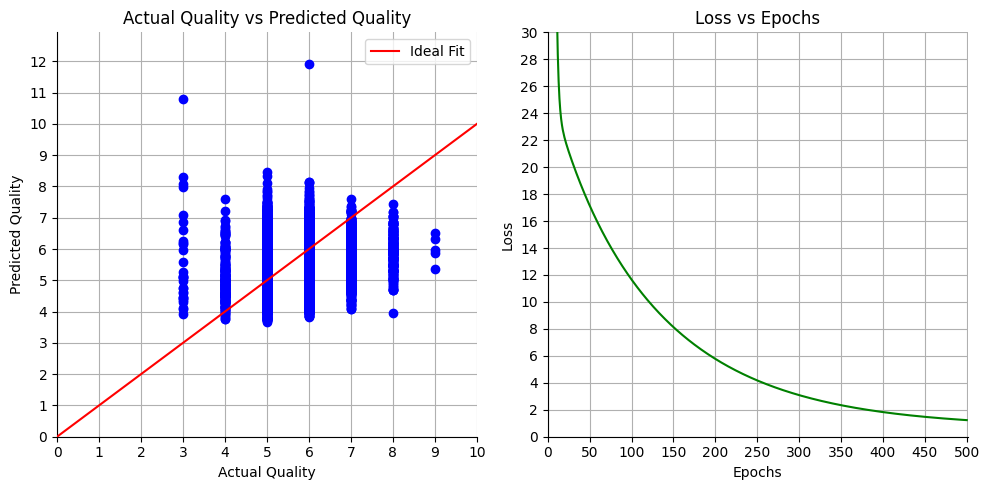

In [20]:
# Plot Actual vs Predicted values
y_predicted_final = model(X_tensor).detach().numpy()  # Get the predicted values
max_value = np.max(y_predicted_final)

plt.figure(figsize=(10, 5))

# 1. Plot Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_tensor.numpy(), y_predicted_final, color='blue', zorder=10)

# Red line from (10, 10) to (0, 0)
plt.plot([10, 0], [10, 0], color='red', label='Ideal Fit', zorder=100)

plt.title('Actual Quality vs Predicted Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

# Adjust x-axis and y-axis limits and set ticks
plt.xlim(0, 10)  # Set x-axis from 0 to 10
plt.ylim(0, max_value + 1)  # Set y-axis to start from 0 and go to max predicted value + 1

# Set x and y axis ticks from 1 in 1
plt.xticks(range(0, 11, 1))  # x-axis from 0 to 10 with steps of 1
plt.yticks(range(0, int(max_value + 2), 1))  # y-axis from 0 to max value with steps of 1

# Remove the top and right spines
ax1 = plt.gca()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Set legend with white background and visible border
plt.legend()

# Set gridlines
plt.grid(True, zorder=0)

# 2. Plot Loss vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), losses, color='green')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set gridlines
plt.grid(True)

# Set the y-axis limit to 30 and make ticks every 2 units
plt.ylim(0, 30)
plt.yticks(range(0, 31, 2))  # y-axis ticks from 0 to 30 with steps of 2

# Set the x-axis with ticks every 50 epochs
plt.xticks(range(0, num_epochs + 1, 50))  # x-axis ticks from 0 to num_epochs with steps of 50
plt.xlim(0, 501)

# Remove the top and right spines
ax2 = plt.gca()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()